In [1]:
import pandas as pd
import numpy as np

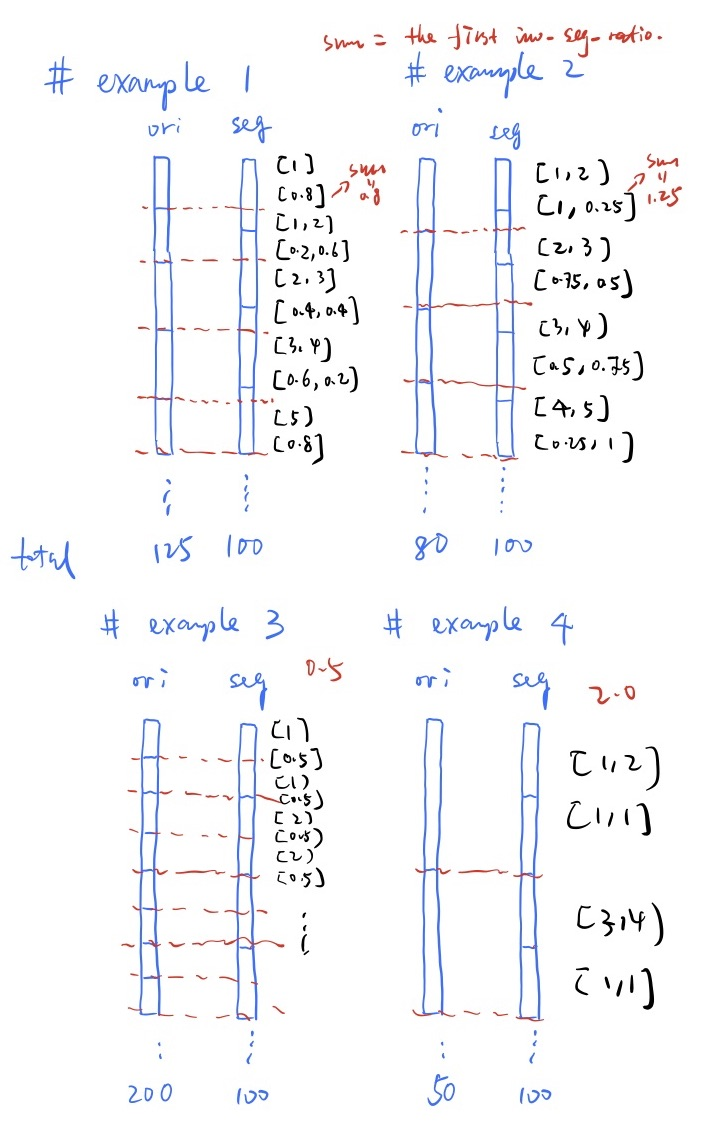

In [57]:
from IPython.display import Image
Image(filename="examples.png")

In [3]:
# example 1
df1=pd.DataFrame(columns=["inv_page_num","inv_total_pages","inv_seg_ratio"])
df1["inv_page_num"]=list(range(1,126))
df1["inv_total_pages"]=[125]*125
df1["inv_seg_ratio"]=df1.inv_page_num/df1.inv_total_pages*100

In [4]:
# example 2
df2=pd.DataFrame(columns=["inv_page_num","inv_total_pages","inv_seg_ratio"])
df2["inv_page_num"]=list(range(1,81))
df2["inv_total_pages"]=[80]*80
df2["inv_seg_ratio"]=df2.inv_page_num/df2.inv_total_pages*100

In [11]:
# example 3
df3=pd.DataFrame(columns=["inv_page_num","inv_total_pages","inv_seg_ratio"])
df3["inv_page_num"]=list(range(1,201))
df3["inv_total_pages"]=[200]*200
df3["inv_seg_ratio"]=df3.inv_page_num/df3.inv_total_pages*100

In [12]:
# example 4
df4=pd.DataFrame(columns=["inv_page_num","inv_total_pages","inv_seg_ratio"])
df4["inv_page_num"]=list(range(1,51))
df4["inv_total_pages"]=[50]*50
df4["inv_seg_ratio"]=df4.inv_page_num/df4.inv_total_pages*100

In [13]:
df1.head()

,inv_page_num,inv_total_pages,inv_seg_ratio
0,1,125,0.8
1,2,125,1.6
2,3,125,2.4
3,4,125,3.2
4,5,125,4.0


In [14]:
df2.head()

,inv_page_num,inv_total_pages,inv_seg_ratio
0,1,80,1.25
1,2,80,2.50
2,3,80,3.75
3,4,80,5.00
4,5,80,6.25


In [15]:
df3.head()

,inv_page_num,inv_total_pages,inv_seg_ratio
0,1,200,0.5
1,2,200,1.0
2,3,200,1.5
3,4,200,2.0
4,5,200,2.5


In [16]:
df4.head()

,inv_page_num,inv_total_pages,inv_seg_ratio
0,1,50,2.0
1,2,50,4.0
2,3,50,6.0
3,4,50,8.0
4,5,50,10.0


In [58]:
import math

In [60]:
x=1234.5678
math.modf(x)[0]

0.5678000000000338

In [61]:
type(math.modf(x)[0])

float

In [212]:
# helper function:
# input - inv_page_num, inv_total_pages, inv_seg_ratio
# output - inv_seg_num_list, inv_seg_val_list

def ratio_to_lists (page_num, total_pages, seg_ratio):
    
    ### starting points
    inv_sum = 100/total_pages # testimony_ratio = first inv_seg_ratio
    list1=[] # inv_seg_num_list
    list2=[] # inv_seg_val_list
    
    ### get list1
    if inv_sum.is_integer() or seg_ratio.is_integer():
        list1=list(range(int(seg_ratio-inv_sum)+1,int(seg_ratio)+1))
    else:
        list1=list(range(int(seg_ratio-inv_sum)+1,int(seg_ratio)+2))
    
    ### get list2
    for i in range(len(list1)):
    
        # get the segment number
        seg_num = list1[i]

        # calculate the last element
        if math.modf(seg_ratio)[0]-0<0.001:
            if inv_sum<1:
                last = round(inv_sum,3)
            else:
                last = 1.0
        else:
            last = round(seg_ratio-(seg_num-1),3)

        # dealing with different lengths
        if len(list1)==1:
            list2 = [last]
        elif len(list1)==2:
            first = round(inv_sum-last-1*(len(list1)-2),3)
            list2 = [first, last]
        else: # >=3
            first = inv_sum-last-1*(len(list1)-2)
            list2 = [first] + [1]*(len(list1)-2) + [last]
    
    ### return list1 and list2 in another list
    # access by ratio_to_lists (page_num, total_pages, seg_ratio) [0]
    # and ratio_to_lists (page_num, total_pages, seg_ratio) [1]
    return [list1,list2]

In [185]:
seg_ratio = 2.0
inv_sum = 2.0
list1=[]

if inv_sum.is_integer() or seg_ratio.is_integer():
    list1=list(range(int(seg_ratio-inv_sum)+1,int(seg_ratio)+1))
else:
    list1=list(range(int(seg_ratio-inv_sum)+1,int(seg_ratio)+2))

list1     

[1, 2]

In [186]:
list2 = []
for i in range(len(list1)):
    
    # get the segment number
    seg_num = list1[i]
    
    # calculate the last element
    if math.modf(seg_ratio)[0]-0<0.001:
        if inv_sum<1:
            last = inv_sum
        else:
            last = 1.0
    else:
        last = seg_ratio-(seg_num-1)
    
    # dealing with different lengths
    if len(list1)==1:
        list2 = [last]
    elif len(list1)==2:
        first = inv_sum-last-1*(len(list1)-2)
        list2 = [first, last]
    else: # >=3
        first = inv_sum-last-1*(len(list1)-2)
        list2 = [first] + [1]*(len(list1)-2) + [last]

list2

[1.0, 1.0]

In [213]:
df1["list1"]=[[]]*len(df1)
df1["list2"]=[[]]*len(df1)

In [214]:
for i in range(len(df1)):
    inv_sum = df1.inv_page_num[i]
    total_pages = df1.inv_total_pages[i]
    seg_ratio = df1.inv_seg_ratio[i]
    df1.list1[i]=ratio_to_lists(inv_sum,total_pages,seg_ratio)[0]
    df1.list2[i]=ratio_to_lists(inv_sum,total_pages,seg_ratio)[1]

/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [215]:
df1

,inv_page_num,inv_total_pages,inv_seg_ratio,list1,list2
0,1,125,0.8,[1],[0.8]
1,2,125,1.6,"[1, 2]","[0.2, 0.6]"
2,3,125,2.4,"[2, 3]","[0.4, 0.4]"
3,4,125,3.2,"[3, 4]","[0.6, 0.2]"
4,5,125,4.0,[4],[0.8]
5,6,125,4.8,[5],[0.8]
6,7,125,5.6,"[5, 6]","[0.2, 0.6]"
7,8,125,6.4,"[6, 7]","[0.4, 0.4]"
8,9,125,7.2,"[7, 8]","[0.6, 0.2]"
9,10,125,8.0,[8],[0.8]


In [216]:
df2["list1"]=[[]]*len(df2)
df2["list2"]=[[]]*len(df2)

In [217]:
for i in range(len(df2)):
    inv_sum = df2.inv_page_num[i]
    total_pages = df2.inv_total_pages[i]
    seg_ratio = df2.inv_seg_ratio[i]
    df2.list1[i]=ratio_to_lists(inv_sum,total_pages,seg_ratio)[0]
    df2.list2[i]=ratio_to_lists(inv_sum,total_pages,seg_ratio)[1]

/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [218]:
df2

,inv_page_num,inv_total_pages,inv_seg_ratio,list1,list2
0,1,80,1.25,"[1, 2]","[1.0, 0.25]"
1,2,80,2.50,"[2, 3]","[0.75, 0.5]"
2,3,80,3.75,"[3, 4]","[0.5, 0.75]"
3,4,80,5.00,"[4, 5]","[0.25, 1.0]"
4,5,80,6.25,"[6, 7]","[1.0, 0.25]"
5,6,80,7.50,"[7, 8]","[0.75, 0.5]"
6,7,80,8.75,"[8, 9]","[0.5, 0.75]"
7,8,80,10.00,"[9, 10]","[0.25, 1.0]"
8,9,80,11.25,"[11, 12]","[1.0, 0.25]"
9,10,80,12.50,"[12, 13]","[0.75, 0.5]"


In [219]:
df3["list1"]=[[]]*len(df3)
df3["list2"]=[[]]*len(df3)

In [220]:
for i in range(len(df3)):
    inv_sum = df3.inv_page_num[i]
    total_pages = df3.inv_total_pages[i]
    seg_ratio = df3.inv_seg_ratio[i]
    df3.list1[i]=ratio_to_lists(inv_sum,total_pages,seg_ratio)[0]
    df3.list2[i]=ratio_to_lists(inv_sum,total_pages,seg_ratio)[1]

/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [221]:
df3

,inv_page_num,inv_total_pages,inv_seg_ratio,list1,list2
0,1,200,0.5,[1],[0.5]
1,2,200,1.0,[1],[0.5]
2,3,200,1.5,[2],[0.5]
3,4,200,2.0,[2],[0.5]
4,5,200,2.5,[3],[0.5]
5,6,200,3.0,[3],[0.5]
6,7,200,3.5,[4],[0.5]
7,8,200,4.0,[4],[0.5]
8,9,200,4.5,[5],[0.5]
9,10,200,5.0,[5],[0.5]


there are 0.0 over there but it's alright. 0.0 will not influence the final sum.

In [222]:
df4["list1"]=[[]]*len(df4)
df4["list2"]=[[]]*len(df4)

In [223]:
for i in range(len(df4)):
    inv_sum = df4.inv_page_num[i]
    total_pages = df4.inv_total_pages[i]
    seg_ratio = df4.inv_seg_ratio[i]
    df4.list1[i]=ratio_to_lists(inv_sum,total_pages,seg_ratio)[0]
    df4.list2[i]=ratio_to_lists(inv_sum,total_pages,seg_ratio)[1]

/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/lizhoufan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [224]:
df4

,inv_page_num,inv_total_pages,inv_seg_ratio,list1,list2
0,1,50,2.0,"[1, 2]","[1.0, 1.0]"
1,2,50,4.0,"[3, 4]","[1.0, 1.0]"
2,3,50,6.0,"[5, 6]","[1.0, 1.0]"
3,4,50,8.0,"[7, 8]","[1.0, 1.0]"
4,5,50,10.0,"[9, 10]","[1.0, 1.0]"
5,6,50,12.0,"[11, 12]","[1.0, 1.0]"
6,7,50,14.0,"[13, 14]","[1.0, 1.0]"
7,8,50,16.0,"[15, 16]","[1.0, 1.0]"
8,9,50,18.0,"[17, 18]","[1.0, 1.0]"
9,10,50,20.0,"[19, 20]","[1.0, 1.0]"


Success!